# BUSINESS PROBLEM UNDERSTANDING

 Dreram housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan after that company validates the customer eligibility for loan.

 Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These deatils are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

Column Name	Description
1. Loan_ID	-Unique identifier for the loan application.
2. Gender	-Applicant's gender (Male/Female).
3. Married	Marital status of the applicant (Yes/No).
4. Dependents	Number of dependents of the applicant (0, 1, 2, 3+).
5. Education	Applicant’s education level (Graduate/Not Graduate).
6. Self_Employed	Whether the applicant is self-employed (Yes/No).
7. ApplicantIncome	Applicant’s income in monetary units.
8. CoapplicantIncome	Co-applicant’s income in monetary units.
9. LoanAmount	Loan amount applied for (in thousands).
10. Loan_Amount_Term	Term of loan repayment (in months).
11. Credit_History	Credit history of the applicant (1.0 = Good, 0.0 = Bad).
12. Property_Area	Type of property location (Urban, Semiurban, Rural).
13. Loan_Status	Loan approval status (Y = Approved, N = Not Approved).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# DATA UNDERSTANDING
- COLLECT AND LOAD THE DATA

In [2]:
df = pd.read_csv(r"C:\Users\L.RAMYA\Downloads\LoanData.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

**Dataset having 614 rows 13 columns**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**The dataset contains (614 rows ,13 columns)i.e..,12 input columns and 1 output column and also there is a missing values** 
- Gender (13 missing)
- Married (3 missing)
- Dependents (15 missing)
- Self_Employed (32 missing)
- LoanAmount (22 missing)
- Loan_Amount_Term (14 missing)
- Credit_History (50 missing)

In [5]:
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

**These are the columns names in a given dataset and also all columns are as per the  syntax**

In [6]:
df['Loan_ID'].nunique()

614

**'Loan_ID' having 614 unique values**  

**drop unimportant columns as per feature selection (filter methods)**

In [7]:
df.drop(columns=['Loan_ID'],inplace=True)

In [8]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

**'Gender' having 2 unique values with null values**

In [9]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

**'Married' having 2 unique values with null values**

In [10]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

**'Dependents' having 4 unique values'3+' is in wrong format  those unique values are  in string format and also having null values**

In [11]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)


**'Education' having 2 unique values**

In [12]:
df['Self_Employed'].unique()


array(['No', 'Yes', nan], dtype=object)

**'Self_Employed' having 2 unique values with null values**

In [13]:
df['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [14]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

**In 'ApplicantIncome' column having these many unique values**

In [15]:
df['CoapplicantIncome'].unique()


array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [16]:
df[ 'CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

**In 'CoapplicantIncome'column having these many  unique values**


In [17]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

**In 'LoanAmount' column having these many unique values with null values**

In [18]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

**In 'Loan_Amount_Term' column having these many unique values with null values**

In [19]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

**In 'Credit_History' column having 2 unique values with null values**

In [20]:
df['Credit_History'] = df['Credit_History'].map({1:'good',0:'bad'})

In [21]:
df['Credit_History'].unique()

array(['good', 'bad', nan], dtype=object)

In [22]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

**In 'Property_Area' column having 3 unique values with no values**

In [23]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

**In 'Loan_Status' column having 2 unique values with no values**

In [24]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

**"The 'Gender' column has 2 unique values: Male (489) and Female (112), with some missing values."**

In [25]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

**"'Married' has 2 unique values: Yes (398) and No (213), with some missing values."**

In [26]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

**"'Dependents' has 4 unique values (0, 1, 2, 3+) with some missing values."**

In [27]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

**"'Education' has 2 unique values: Graduate (480) and Not Graduate (134), with no missing values."**

In [28]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

**"'Self_Employed' has 2 unique values: No (500) and Yes (82), with some missing values."**

In [29]:
df['ApplicantIncome'].value_counts()

ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64

**"'ApplicantIncome' has 505 unique values, with 2500 appearing most frequently (9 times). The data is continuous and may require normalization or transformation for analysis."**

In [30]:
df['CoapplicantIncome'].value_counts()

CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64

**"'CoapplicantIncome' has 287 unique values, with 0.0 appearing most frequently (273 times), indicating many applicants have no co-applicant. The data is continuous and may require normalization or transformation for analysis."**

In [31]:
df['Income'] = df['ApplicantIncome']+df['CoapplicantIncome']
df.drop(columns = ['ApplicantIncome','CoapplicantIncome'],inplace=True)

In [32]:
df['LoanAmount'].value_counts()

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

**"'LoanAmount' has 203 unique values, with 120.0 appearing most frequently (20 times). The data is continuous, has some missing values, and may require scaling or imputation for analysis."**

In [33]:
df['Credit_History'].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

**"'Credit_History' has 2 unique values: 1.0 (475) and 0.0 (89), with some missing values. A majority of applicants have a credit history of 1.0, indicating good credit standing."**

In [34]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

**"'Property_Area' has 3 unique categories: Semiurban (233), Urban (202), and Rural (179), with no missing values. Semiurban properties are the most common among applicants."**

In [35]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

**"'Loan_Status' has 2 unique values: Y (Approved) - 422 and N (Not Approved) - 192, with no missing values. The majority of loan applications were approved."**

In [36]:
continous = ['Income','LoanAmount']

discrete_categorical = ['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']

discrete_count = ['Dependents','Loan_Amount_Term']

**Exploratory Data Analysis(EDA)**
- for continous Variables

In [37]:
df[continous].describe()

,Income,LoanAmount
count,614.000000,592.000000
mean,7024.705081,146.412162
std,6458.663872,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


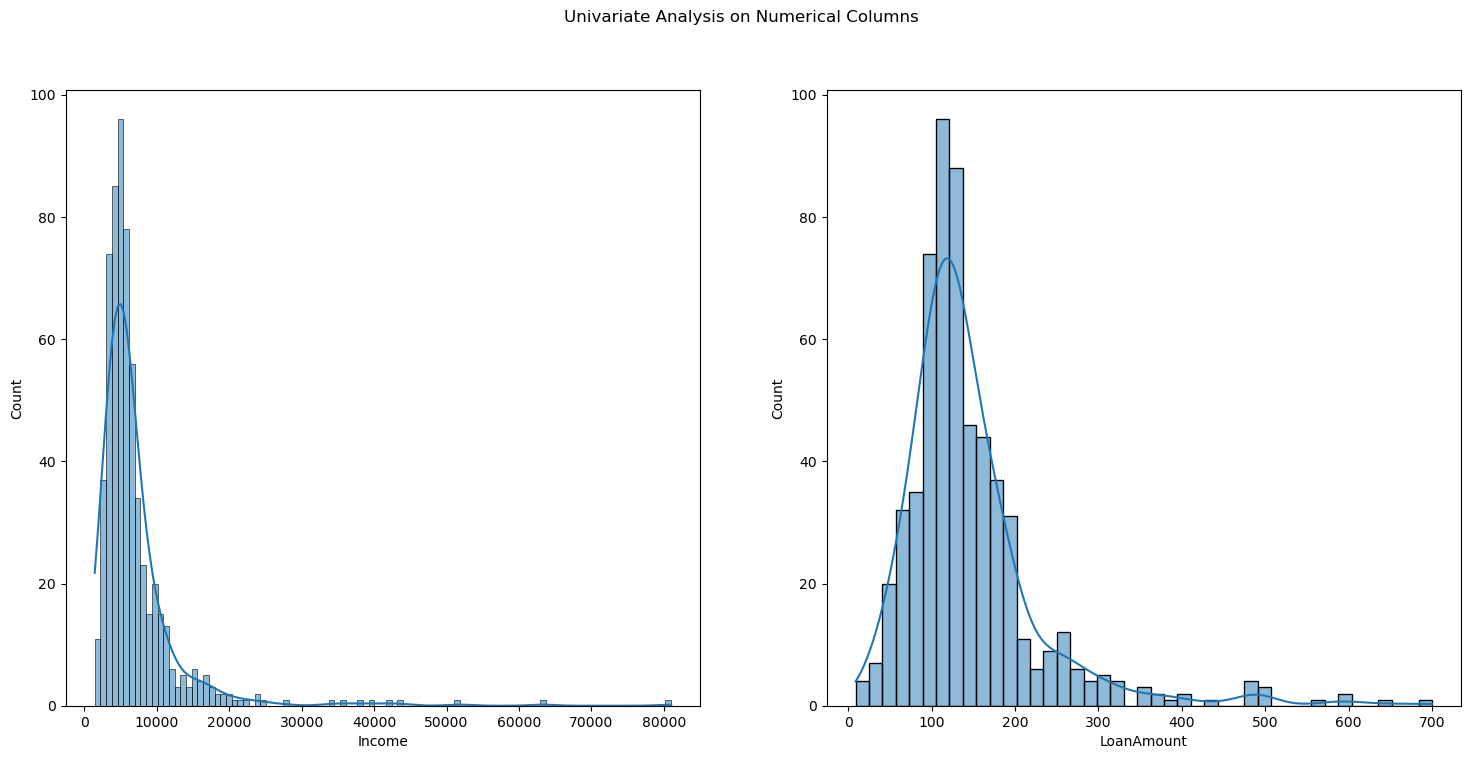

In [38]:
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
sns.histplot(df['Income'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['LoanAmount'],kde=True)

plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

In [39]:
df[continous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

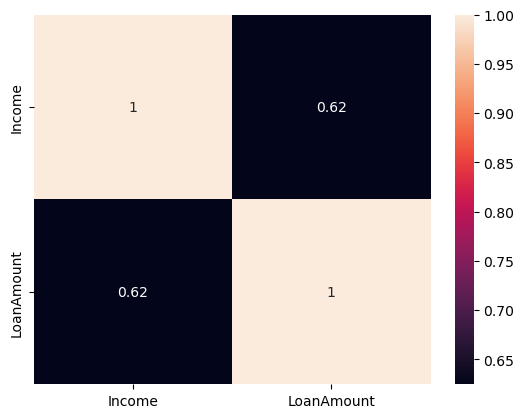

In [40]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

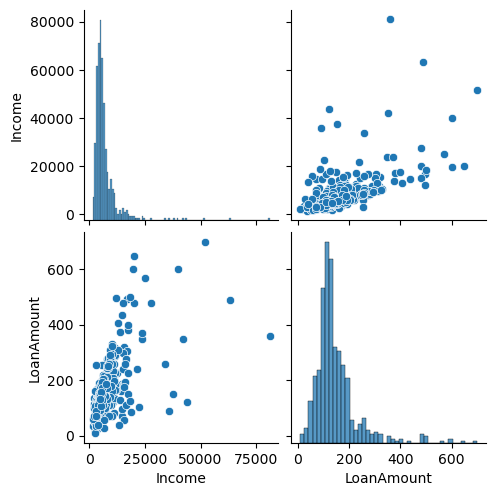

In [41]:
sns.pairplot(df[continous])
plt.show()

**for discrete variables**

In [42]:
df[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


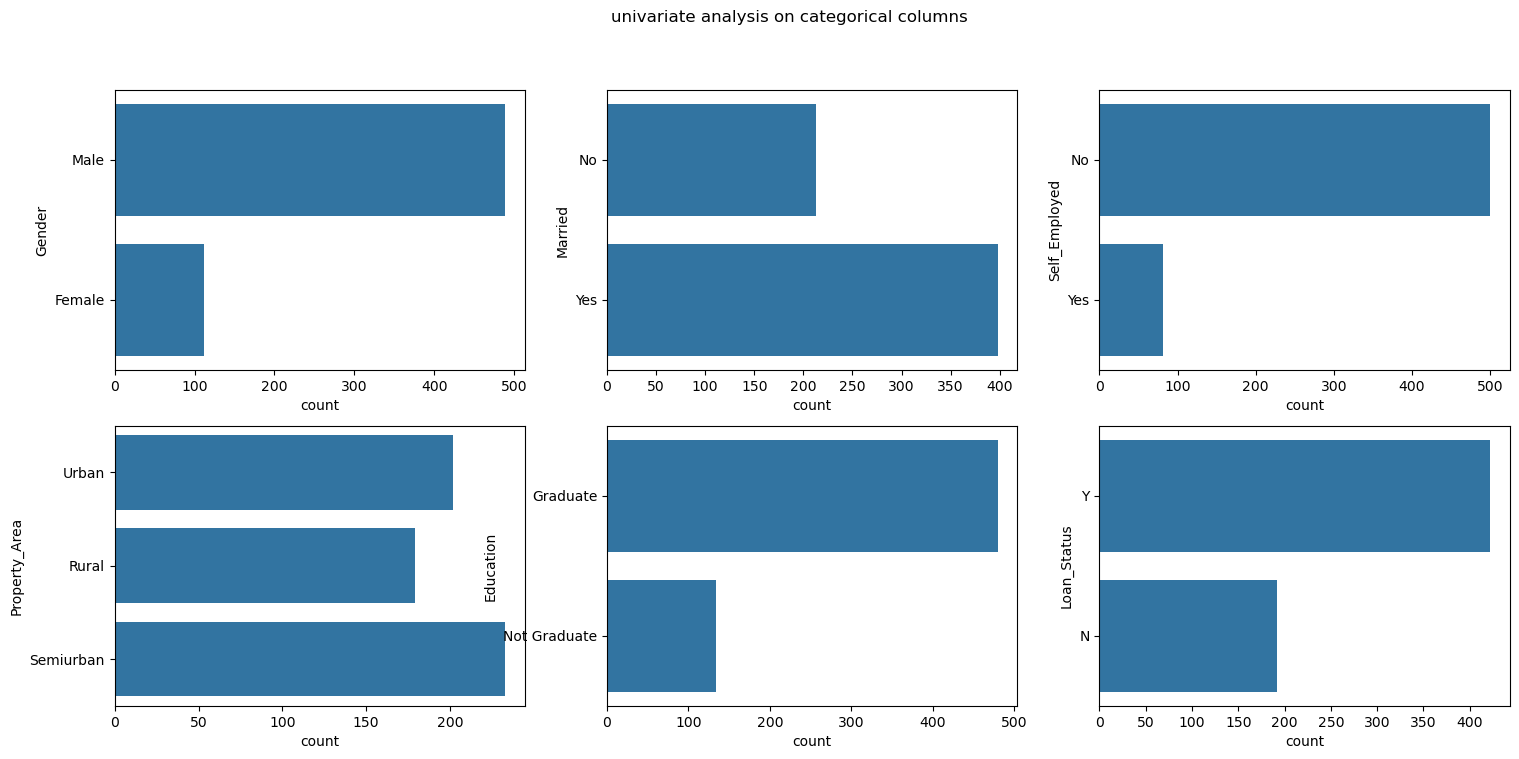

In [43]:
plt.figure(figsize=(18,8))

plt.subplot(2,3,1)
sns.countplot(df['Gender'])

plt.subplot(2,3,2)
sns.countplot(df['Married'])

plt.subplot(2,3,3)
sns.countplot(df['Self_Employed'])

plt.subplot(2,3,4)
sns.countplot(df['Property_Area'])

plt.subplot(2,3,5)
sns.countplot(df['Education'])

plt.subplot(2,3,6)
sns.countplot(df['Loan_Status'])

plt.suptitle('univariate analysis on categorical columns')
plt.show()

**Missing Values Treatment**

In [44]:
df.isna().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

**check for skewness**

In [45]:
df[continous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

**check the outliers**

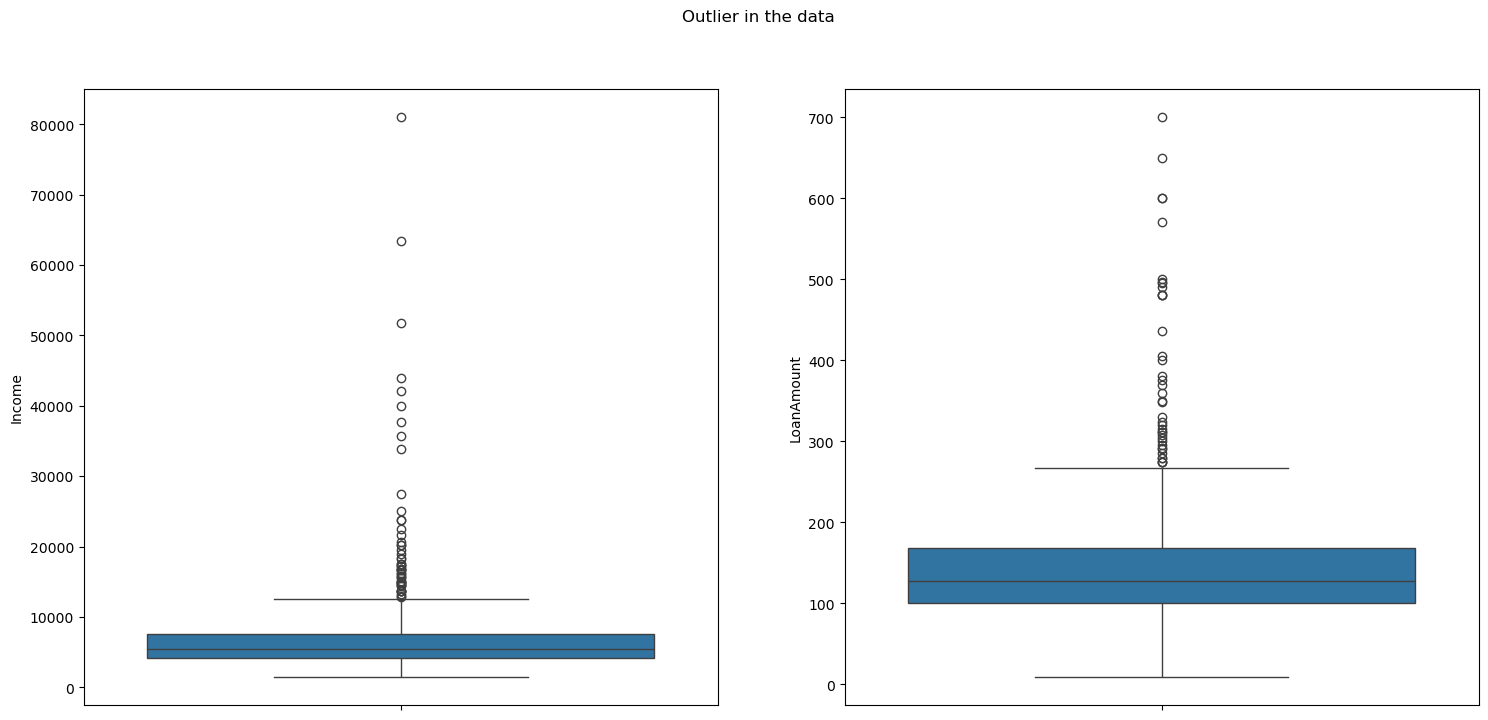

In [46]:
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
sns.boxplot(df['Income'])


plt.subplot(1,2,2)
sns.boxplot(df['LoanAmount'])

plt.suptitle('Outlier in the data')
plt.show()

# DATA PREPARTION

1. Data Cleaning
   - wrong data
   - missing values
   - wrong data type
   - duplicates
   - outliers
2. Data wrangling
   - transformation (applicable on continous)
   - scaling(applicable ob continous)
   - encoding(applicable on discrete categorical)
   - **Don't apply any data wrangling technique on count variable**

**wrong data treatment**

In [47]:
df['Dependents']=df['Dependents'].replace({'3+':3})

**missing values treatment**

In [48]:
# count variable replace with 0 
df['Dependents']=df['Dependents'].fillna(0)
#categorical variables replace with Mode
df['Gender'] =df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] =df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df =df.dropna(subset=['Income','LoanAmount','Loan_Amount_Term','Credit_History'])

In [49]:
#categorical variables replace with Mode
df['Gender'] =df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] =df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

**data type conversion**

In [50]:
df['Dependents']=df['Dependents'].astype('int')
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype('int')

**outlier treatment**
- outliers should be retrained (because really some people will have high income)

**Transformations**

In [51]:
# lets apply boxcox transformation to remove skewness
from scipy.stats import boxcox
df['Income'],a = boxcox(df['Income'])
df['LoanAmount'],c = boxcox(df['LoanAmount'])

In [52]:
df[['Income','LoanAmount']].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

In [53]:
df['Gender'] = df['Gender'].replace({"Male":1,"Female":0})
df['Married'] = df['Married'].replace({"Yes":1,"No":0})
df['Education'] = df['Education'].replace({'Graduate':1,'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'].replace({"Yes":1,'No':0})
df['Property_Area'] = df['Property_Area'].replace({"Rural":0,'Semiurban':1,'Urban':2})
df['Credit_History'] = df['Credit_History'].replace({'good':1,'bad':0})
df['Loan_Status'] = df['Loan_Status'].replace({'Y':1,'N':0})


In [54]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,1,0,6.243267,360,1,0,0,1.864967
2,1,1,0,1,1,5.202610,360,1,2,1,1.856556
3,1,1,0,0,0,6.138816,360,1,2,1,1.862802
4,1,0,0,1,0,6.401083,360,1,2,1,1.864819
5,1,1,2,1,1,7.481931,360,1,2,1,1.868932
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,5.313992,360,1,0,1,1.856068
610,1,1,3,1,0,4.460305,180,1,0,1,1.860675
611,1,1,1,1,0,7.388071,360,1,2,1,1.867771
612,1,1,2,1,0,6.870558,360,1,2,1,1.866991


# X and y

In [55]:
X = df.drop('Loan_Status',axis= 1)
y =df['Loan_Status']

**Train-Test Split**

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=True)


# Stage-4:Modelling and Evaluation

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score



# LOGISTIC REGRESSION

In [58]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

ypred_train = log_reg.predict(X_train)

# train accuarcy
from sklearn.metrics import accuracy_score
print('train accuracy',accuracy_score(y_train,ypred_train))

# crossvalidation score
from sklearn.model_selection import cross_val_score
print('cvscore',cross_val_score(log_reg,X_train,y_train,cv=5,scoring ='accuracy').mean())

ypred_test = log_reg.predict(X_test)
print('testaccuracy',accuracy_score(y_test,ypred_test))


train accuracy 0.806146572104019
cvscore 0.803781512605042
testaccuracy 0.839622641509434


In [59]:
%%timeit
log_reg.fit(X_train,y_train)

48.3 ms ± 3.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()

param_grid = {'n_neighbors':list(range(1,20))}

from sklearn.model_selection import GridSearchCV
cv_classifier = GridSearchCV(estimator,param_grid,cv=5,scoring = 'accuracy')

cv_classifier.fit(X_train,y_train)

cv_classifier.best_params_

{'n_neighbors': 10}

In [61]:
#modelling
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

#prediction 
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

#Evalution 
from sklearn.metrics import accuracy_score
print('train accuracy',accuracy_score(y_train,y_pred_train))
print('test accuracy',accuracy_score(y_test,y_pred_test))

from sklearn.model_selection import cross_val_score
print('cross validation score',cross_val_score(knn,X,y,cv=5).mean())


train accuracy 0.7919621749408984
test accuracy 0.7264150943396226
cross validation score 0.7428212039532796


In [62]:
%%timeit
knn.fit(X_train,y_train)

4.79 ms ± 312 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# SVM

In [63]:
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

estimator =SVC()

param_grid = {'C':[0.1,0.2,1,10],'kernel':['linear','rbf','sigmoid','poly']}

grid = GridSearchCV(estimator,param_grid,cv=5)

grid.fit(X,y)

grid.best_params_




{'C': 0.1, 'kernel': 'linear'}

In [64]:
model = SVC(kernel = 'linear',C =0.1)
model.fit(X_train,y_train)

ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
print('cross validation score',cross_val_score(model,X,y,cv=5).mean())
print( 'train:',accuracy_score(y_train,ypred_train))
print('test:',accuracy_score(y_test,ypred_test))


cross validation score 0.8148068283917341
train: 0.8085106382978723
test: 0.839622641509434


%%timeit
model.fit(X_train,y_train)

# DECISION TREE

In [66]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(random_state= True)

param_grid ={'criterion':['gini','Entropy'],'max_depth':range(1,16)}

grid = GridSearchCV(estimator,param_grid,scoring ='accuracy',cv= 5)

grid.fit(X_train,y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [67]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini',max_depth= 1,random_state=True)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1, random_state=True)

In [68]:
from sklearn.tree import plot_tree
plt.figure (figsize=(20,20),dpi=500)

plot_tree(model,filled=True,feature_names=X_train.columns.tolist(),
          class_names= ['0','1'])
plt.show()

In [69]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [70]:
s1 = pd.DataFrame(model.feature_importances_,
                  columns = ['feature_importance'],
                  index = X_train.columns.tolist())
imp =s1[s1['feature_importance']>0].index.tolist()
imp

['Credit_History']

In [71]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
333,1,1,0,1,0,8.575697,180,1,2,1.878079
372,1,1,2,1,1,8.109620,300,1,0,1.872774
409,1,1,3,1,0,8.012017,360,0,0,1.878729
7,1,1,3,1,0,6.588771,360,0,1,1.864016
568,0,0,0,1,0,2.457005,360,1,2,1.853032
...,...,...,...,...,...,...,...,...,...,...
155,1,1,3,1,0,8.955540,180,0,1,1.876610
172,1,1,3,0,0,5.517040,180,1,0,1.858747
88,1,0,0,1,0,7.067306,360,1,2,1.868019
275,1,1,1,1,0,6.070304,360,1,1,1.861985


In [72]:
X_train1 = X_train[imp]
X_test1 = X_test[imp]

In [73]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini',max_depth= 3,random_state=True)
model.fit(X_train1,y_train) 

ypred_train = model.predict(X_train1)
ybase_pred = model.predict(X_test1)

from sklearn.metrics import accuracy_score
print('train accuracy',accuracy_score(ypred_train,y_train))
print('test accuracy',accuracy_score(ybase_pred,y_test))
from sklearn.model_selection import cross_val_score
print('cross validation score',cross_val_score(model,X,y,cv=5).mean())

train accuracy 0.8085106382978723
test accuracy 0.839622641509434
cross validation score 0.8091284815813118


%%timeit
model.fit(X_train,y_train) 

# RANDOM FOREST 

In [75]:
from sklearn.model_selection import GridSearchCV

#model
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state= True)

#parameters(which you want to tune and identify the best)
param_grid ={'n_estimators':list(range(1,16))}

grid = GridSearchCV(estimator,param_grid,scoring ='accuracy',cv= 5)

grid.fit(X_train,y_train)

grid.best_params_

{'n_estimators': 15}

In [76]:
# best model
grid.best_estimator_

RandomForestClassifier(n_estimators=15, random_state=True)

In [77]:
grid.best_estimator_.feature_importances_

array([0.02125048, 0.02896799, 0.05391343, 0.03101642, 0.01456987,
       0.22540476, 0.04306179, 0.27316943, 0.05505681, 0.25358902])

In [78]:
s1 = pd.DataFrame(grid.best_estimator_.feature_importances_,
                  columns = ['feature_importance'],
                  index = X_train.columns.tolist())
imp =s1[s1['feature_importance']>0].index.tolist()
imp

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [79]:
X_train2 = X_train[imp]
X_test2  = X_test[imp]

final_rf_model = RandomForestClassifier(n_estimators=5,random_state=True)
final_rf_model.fit(X_train2,y_train)

ypred_train = final_rf_model.predict(X_train2)

from sklearn.metrics import accuracy_score
print('trainaccuracy:',accuracy_score(ypred_train,y_train))

from sklearn.model_selection import cross_val_score
print('crossvalidationscore:',cross_val_score(final_rf_model,X,y,cv=5).mean())

ypred_test = final_rf_model.predict(X_test2)
print('testaccuracy:',accuracy_score(ypred_test,y_test))

trainaccuracy: 0.9598108747044918
crossvalidationscore: 0.758095238095238
testaccuracy: 0.7924528301886793


# ADA BOOST 

In [81]:
#model
from sklearn.ensemble import AdaBoostClassifier
estimator_ab = AdaBoostClassifier(random_state= True)

#parameters(which you want to tune and identify the best)
param_grid_ab ={'n_estimators':list(range(1,100))}

#grid search
grid_ab = GridSearchCV(estimator_ab,param_grid_ab,scoring ='accuracy',cv= 5)
grid_ab.fit(X_train,y_train)

# best parameters for adaboost model
grid_ab.best_estimator_

AdaBoostClassifier(n_estimators=16, random_state=True)

In [82]:
feat = grid_ab.best_estimator_.feature_importances_
feat

array([0.    , 0.    , 0.0625, 0.0625, 0.    , 0.125 , 0.0625, 0.0625,
       0.125 , 0.5   ])

In [83]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
333,1,1,0,1,0,8.575697,180,1,2,1.878079
372,1,1,2,1,1,8.109620,300,1,0,1.872774
409,1,1,3,1,0,8.012017,360,0,0,1.878729
7,1,1,3,1,0,6.588771,360,0,1,1.864016
568,0,0,0,1,0,2.457005,360,1,2,1.853032
...,...,...,...,...,...,...,...,...,...,...
155,1,1,3,1,0,8.955540,180,0,1,1.876610
172,1,1,3,0,0,5.517040,180,1,0,1.858747
88,1,0,0,1,0,7.067306,360,1,2,1.868019
275,1,1,1,1,0,6.070304,360,1,1,1.861985


In [84]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Income'],
      dtype='object')

In [85]:
s1 = pd.DataFrame(data = feat,
                  columns=['featureimportance'],
                  index = X.columns)
imp_features_list_ab = s1[s1['featureimportance']>0].index.to_list()
imp_features_list_ab
                

['Dependents',
 'Education',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

# gradient boost
- applying hyperparameter tuning for identifying best parameters for gradient boost

In [86]:
from sklearn.model_selection import GridSearchCV

#model
from sklearn.ensemble import GradientBoostingClassifier
estimator_gb = GradientBoostingClassifier(random_state= True)

#parameters(which you want to tune and identify the best)
param_grid ={'n_estimators':[1,5,10,20,30],
            'learning_rate':[0.1,0.2,0.3,0.5,0.8,1]}

#grid search
grid_gb = GridSearchCV(estimator_gb,param_grid,scoring ='accuracy',cv= 5)
grid_gb.fit(X_train,y_train)

# best parameters for adaboost model
grid_gb.best_params_

{'learning_rate': 0.1, 'n_estimators': 5}

In [87]:
grid_gb.best_estimator_.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06733039, 0.02172607, 0.79113942, 0.00145384, 0.11835028])

In [88]:
s1 = pd.DataFrame(grid_gb.best_estimator_.feature_importances_,
                  columns=['featureimportance'],
                  index = X.columns)
imp_features_list_gb = s1[s1['featureimportance']>0].index.to_list()
imp_features_list_gb

['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Income']

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score




# Ensure `X_imp` and `y` have the same number of rows
X_imp = X[imp_features_list_gb]

# Correct order of train_test_split
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X_imp, y, test_size=0.2, random_state=42)

# Initialize and train AdaBoostClassifier
ada =GradientBoostingClassifier(n_estimators=9, random_state=42)
ada.fit(X_train_gb, y_train_gb)

# Predictions
ypred_train_gb = ada.predict(X_train_gb)
ypred_test_gb = ada.predict(X_test_gb)

# Train accuracy
print('trainaccuracy:', accuracy_score(y_train_gb, ypred_train_gb))

# Cross-validation score
print('crossvalidationscore:', cross_val_score(ada, X_train_gb, y_train_gb, cv=5).mean())

# Test accuracy
print('testaccuracy:', accuracy_score(y_test_gb, ypred_test_gb))


trainaccuracy: 0.817966903073286
crossvalidationscore: 0.8038095238095238
testaccuracy: 0.8301886792452831


# XGBOOST
- **APPLYING HYPERPARAMETER TUNING FOR IDENTIFYING BEST PARAMETERS FOR XGBOOST**

In [91]:
from sklearn.model_selection import GridSearchCV
# model/estimator
from xgboost import XGBClassifier
estimator_xgb = XGBClassifier()

#parameters grid
param_grid = {'n_estimators':[10,20,40,100],
              'max_depth':[3,4,5],
              'gamma':[0,0.15,0.3,0.5,1]}

#grid search

grid_xgb = GridSearchCV(estimator_xgb,param_grid,cv=5,scoring='accuracy')
grid_xgb.fit(X_train,y_train)

# best parameters for XGB model
grid_xgb.best_params_

{'gamma': 0.3, 'max_depth': 3, 'n_estimators': 20}

# XGB MODEL IMPORTANT FEATURES

In [92]:
feats_xgb = pd.DataFrame(data = grid_xgb.best_estimator_.feature_importances_,
                        index = X.columns,
                         columns=['Importance'])
imp_features_list_xgb = feats_xgb[feats_xgb['Importance']>0].index.to_list()
imp_features_list_xgb 

['Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

# Xtreme gradientboost with important features and best hyperparameters

In [93]:
X_imp_xgb = X[imp_features_list_xgb]

X_train_xgb,X_test_xgb,y_train_xgb,y_test_xgb = train_test_split(X_imp_xgb,y,test_size=0.2,random_state = True)

# modelling 
from xgboost import XGBClassifier
xgb = XGBClassifier(gamma=0,max_depth=3,n_estimators=40)
xgb.fit(X_train_xgb,y_train_xgb)

# evalution
from sklearn.metrics import accuracy_score
ypred_train = xgb.predict(X_train_xgb)
print('train accuracy:',accuracy_score(y_train_xgb,ypred_train))

# cross validation
from sklearn.model_selection import cross_val_score
print("cross validation score:",cross_val_score(xgb,X_train_xgb,y_train_xgb,cv=5).mean())

# evalution of test data

ypred_test = xgb.predict (X_test_xgb)
print('test accuracy:',accuracy_score(y_test_xgb,ypred_test))

train accuracy: 0.900709219858156
cross validation score: 0.7895798319327731
test accuracy: 0.7924528301886793
